Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Spherical(c=0.005), interact_mode='transmit')
2 Surface(profile=Spherical(c=0.024177365150745873), interact_mode='transmit')
3 Surface(profile=Spherical(c=-0.03385354954466976), interact_mode='transmit')
4 Surface(profile=Spherical(c=0.004273778233647456), interact_mode='transmit')
5 Surface(profile=Spherical(c=-0.02418379685610641), interact_mode='transmit')
6 Surface(profile=Spherical(c=0.03456141563558443), interact_mode='transmit')
7 Surface(profile=Spherical(c=-0.02115864753924929), interact_mode='transmit')
8 Surface(profile=Spherical(c=0.02479789713832267), interact_mode='transmit')
9 Surface(profile=Spherical(c=0.0), interact_mode='transmit')
10 Surface(profile=EvenPolynomial(c=-0.005, cc=0.0, coefs=[0.0, -3.46513e-05, -5.82425e-08, -3.01558e-11, 7.98551e-14, 0.0, 0.0]), interact_mode='transmit')
11 Surface(profile=Spherical(c=-0.003936666902866681), interact_mode='transmit')
12 Surface(prof

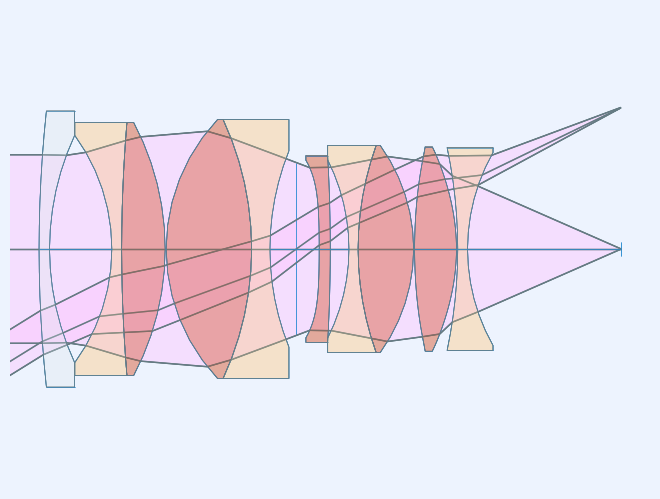

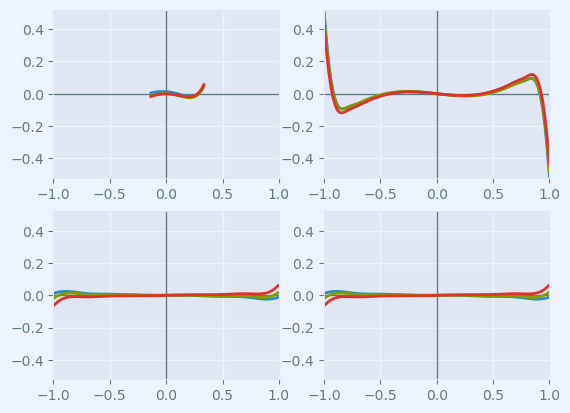

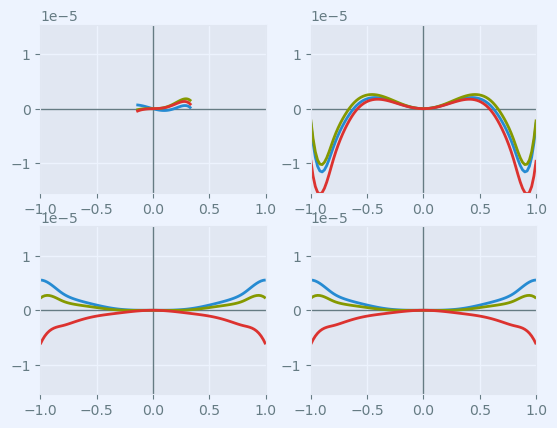

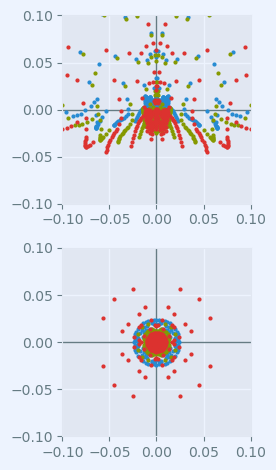

In [1]:
%matplotlib inline
isdark = False
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

# JP2004-101880 Example 2 (Cosina Voigtlander Nokton 35mm F1.2 Aspherical)
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=1.24)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 31.8])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = "JP2004-101880 Example 2 (Cosina Voigtlander Nokton 35mm F1.2 Aspherical)"
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([200.0,1.6,'FC5','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 21.15
sm.add_surface([41.361,9.55])
sm.ifcs[sm.cur_surface].max_aperture = 17.41
sm.add_surface([-29.539,1.5,'E-FL6','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 17.41
sm.add_surface([233.985,6.67,'TAF3D','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 19.4
sm.add_surface([-41.35,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 19.4
sm.add_surface([28.934,13.1,'TAF3D','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 19.84
sm.add_surface([-47.262,2.8,'E-FD2','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 19.84
sm.add_surface([40.326,4.04])
sm.ifcs[sm.cur_surface].max_aperture = 15.03
sm.add_surface([0.0,3.51])
sm.set_stop()
sm.ifcs[sm.cur_surface].max_aperture = 13.237
sm.add_surface([-200.0,1.7,'NBFD13','Hoya'])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=-200.0, cc=0.0,
	coefs=[0.0,-3.46513E-5,-5.82425E-8,-3.01558E-11,7.98551E-14,0.0,0.0])
sm.ifcs[sm.cur_surface].max_aperture = 13.61
sm.add_surface([-254.022,2.86])
sm.ifcs[sm.cur_surface].max_aperture = 14.32
sm.add_surface([-30.236,1.4,'FD60','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 13.66
sm.add_surface([46.963,8.51,'TAF3D','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 15.88
sm.add_surface([-27.172,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 15.88
sm.add_surface([81.004,6.41,'NBFD13','Hoya'])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=81.004, cc=0.0,
	coefs=[0.0,3.63823E-6,-2.57284E-8,2.13341E-10,-5.87072E-13,0.0,0.0])
sm.ifcs[sm.cur_surface].max_aperture = 15.66
sm.add_surface([-31.428,0.2])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=-31.428, cc=0.0,
	coefs=[0.0,1.17867E-5,-3.91138E-8,2.32768E-10,-5.55678E-13,0.0,0.0])
sm.ifcs[sm.cur_surface].max_aperture = 15.66
sm.add_surface([-75.075,1.5,'E-FEL1','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 15.55
sm.add_surface([30.0,23.5])
sm.ifcs[sm.cur_surface].max_aperture = 14.79
sm.list_surfaces()
sm.list_gaps()
sm.do_apertures = False
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, 
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()